# OSM24 Poster

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
import seaborn as sns
import seaborn
import pandas as pd
import numpy as np
from importlib import reload
import cartopy.crs as ccrs
import cmocean.cm as cmo
import gsw

import density_funcs as df
import EV_funcs as ef
import filt_funcs as ff
import plot_funcs as pf
import processing_funcs as prf

In [3]:
font = {'family' : 'normal',
        'size'   : 24}

mpl.rc('font', **font)

### Motivation

In [4]:
#put glider plot here

In [5]:
glid_num = '659'
ds_rho = xr.open_dataset('/home/amf2288/argo-intern/SWIR_ACC_glider_tracer_analysis/data/sg_'+glid_num+'_iso_grid.nc')
ds_z   = xr.open_dataset('/home/amf2288/argo-intern/SWIR_ACC_glider_tracer_analysis/data/sg_'+glid_num+'_4m_binned.nc')

In [25]:
ds_z['spice'] = gsw.spiciness0(ds_z.SA,ds_z.CT).rename('spice')
ds_z.spice.attrs['standard_name'] = 'Spice'
ds_z.spice.attrs['units'] = ''
ds_z.spice.attrs['comment'] = 'calculated using gsw.spiciness0'
ds_z.spice.attrs['platform'] = ''
ds_z.spice.attrs['history'] = ''
ds_z.spice.attrs['outlier_lims'] = ''

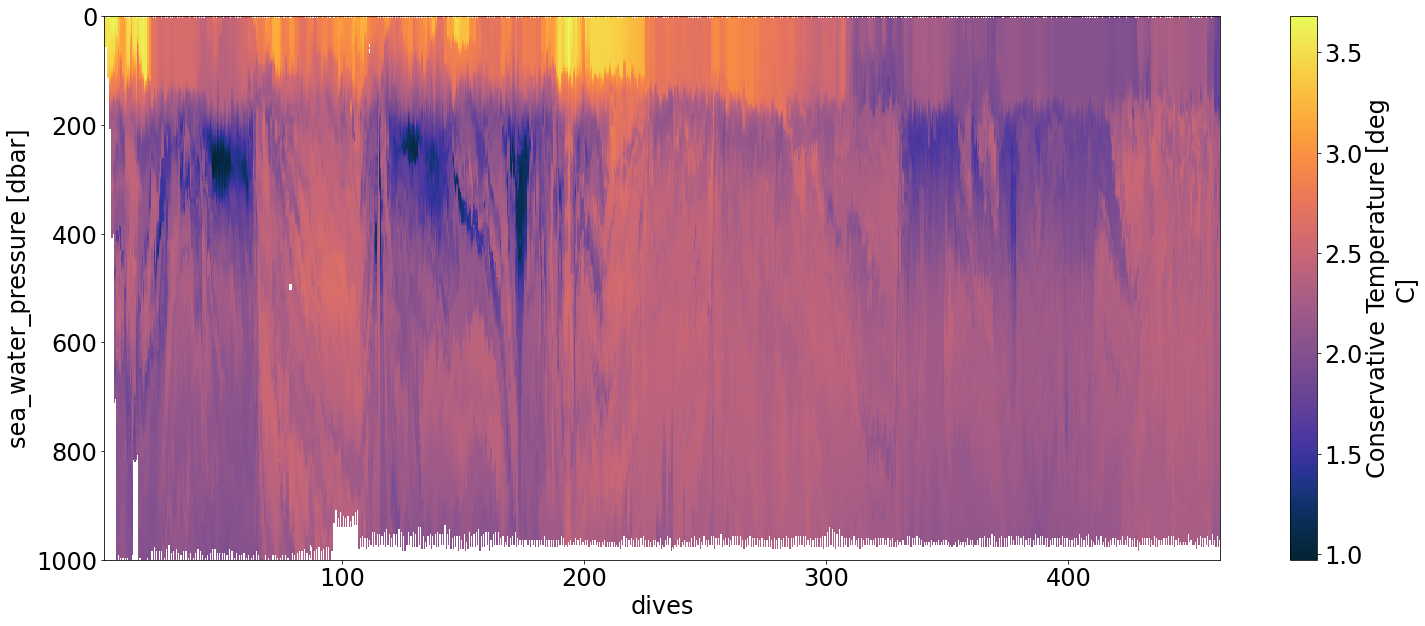

In [13]:
plt.figure(figsize=(25,10))
ds_z.CT.plot(y='ctd_pressure',cmap=cmo.thermal)
plt.gca().invert_yaxis()

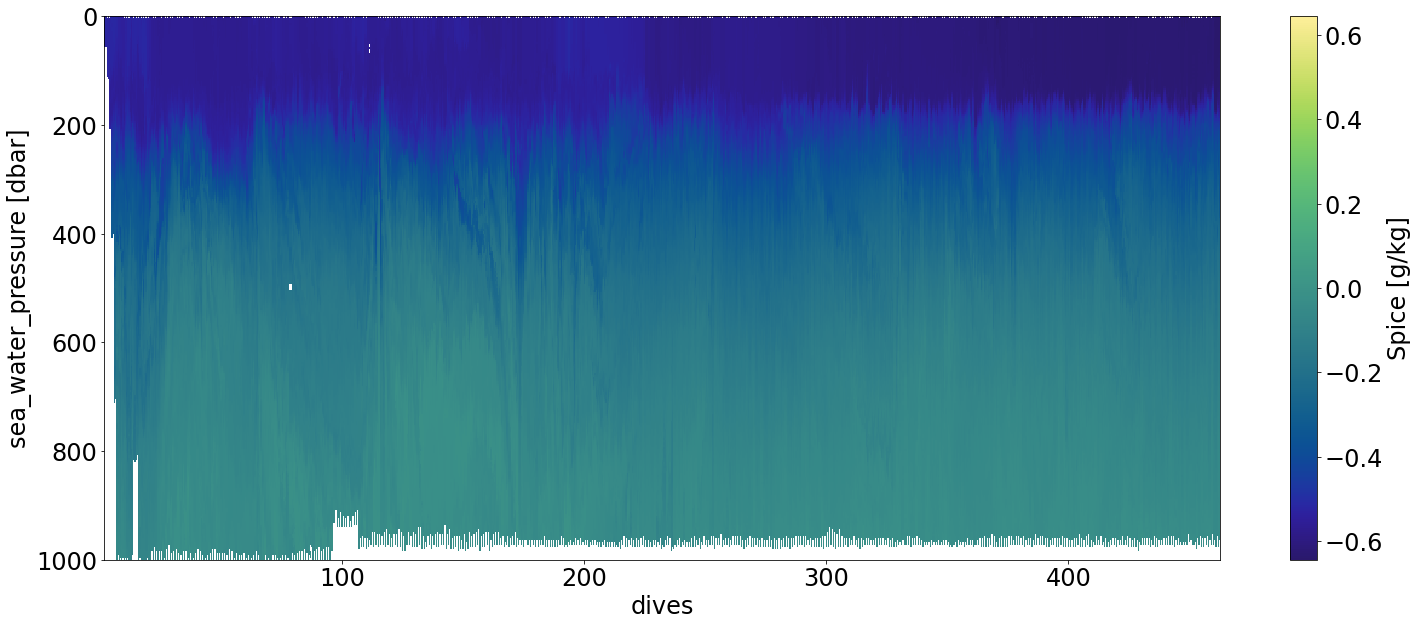

In [23]:
plt.figure(figsize=(25,10))
ds_z.spice.plot(y='ctd_pressure',cmap=cmo.haline)
plt.gca().invert_yaxis()

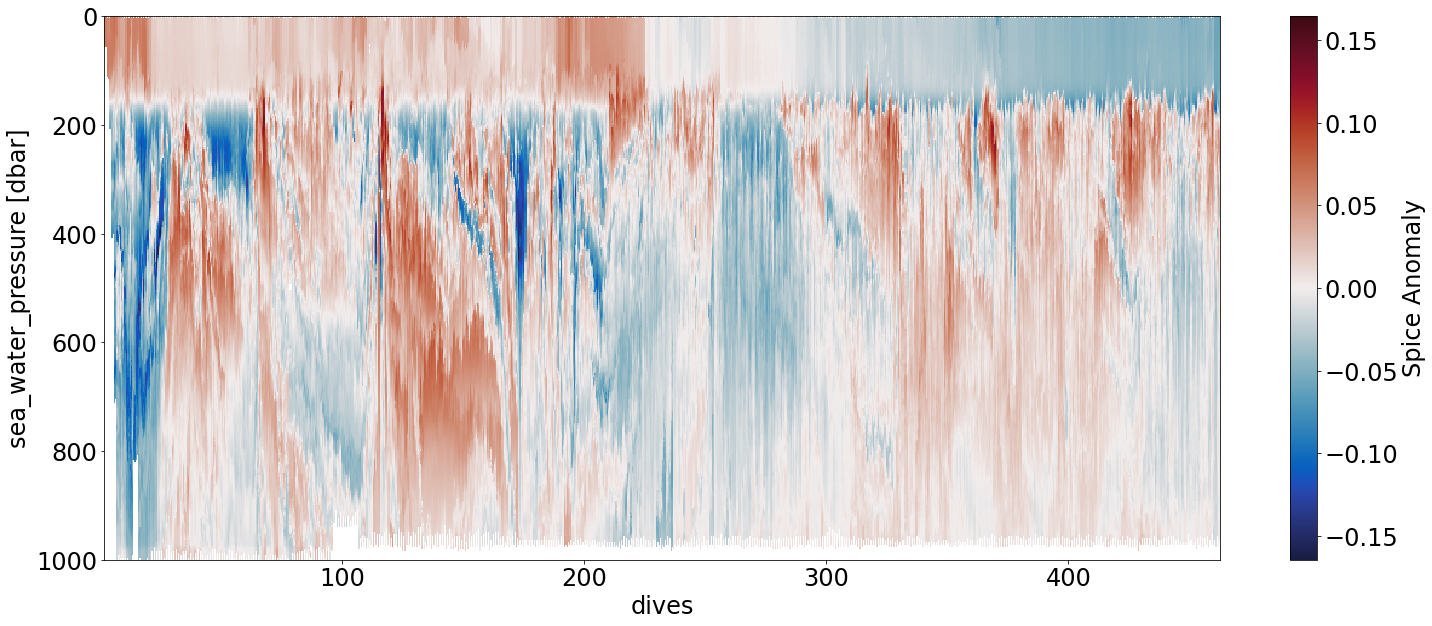

In [32]:
plt.figure(figsize=(25,10))
(ds_z.spice-ds_z.spice.mean('dives')).plot(y='ctd_pressure',cmap=cmo.balance,cbar_kwargs={'label': 'Spice Anomaly'})
plt.gca().invert_yaxis()

## Methods

In [51]:
#this will depend on how you end up plotting 

## Results

### Atlantic Full Section

In [201]:
atl = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-25,-20)_lat:(-70,70)_ds_z.nc')

In [190]:
temp_anom = atl.CT- atl.CT.mean('N_PROF')
psal_anom = atl.SA - atl.SA.mean('N_PROF')
spic_anom = atl.SPICE - atl.SPICE.mean('N_PROF')

atl = atl.assign(CT_anom=(['N_PROF','PRES_INTERPOLATED'],temp_anom.data))
atl = atl.assign(SA_anom=(['N_PROF','PRES_INTERPOLATED'],psal_anom.data))
atl = atl.assign(SPICE_anom=(['N_PROF','PRES_INTERPOLATED'],spic_anom.data))

In [ ]:
lfilter = 75
lat_bins = np.arange(-70,70,5)
SPICE_anom_binned = atl.SPICE.groupby_bins('LATITUDE',lat_bins) - atl.SPICE.groupby_bins('LATITUDE',lat_bins).mean('N_PROF')
atl = atl.assign(SPICE_anom_binned=(['N_PROF','PRES_INTERPOLATED'],SPICE_anom_binned.data))
atl_SPICE_anom_binned_EKE = ef.get_EV(atl,lfilter,variable='SPICE_anom_binned')

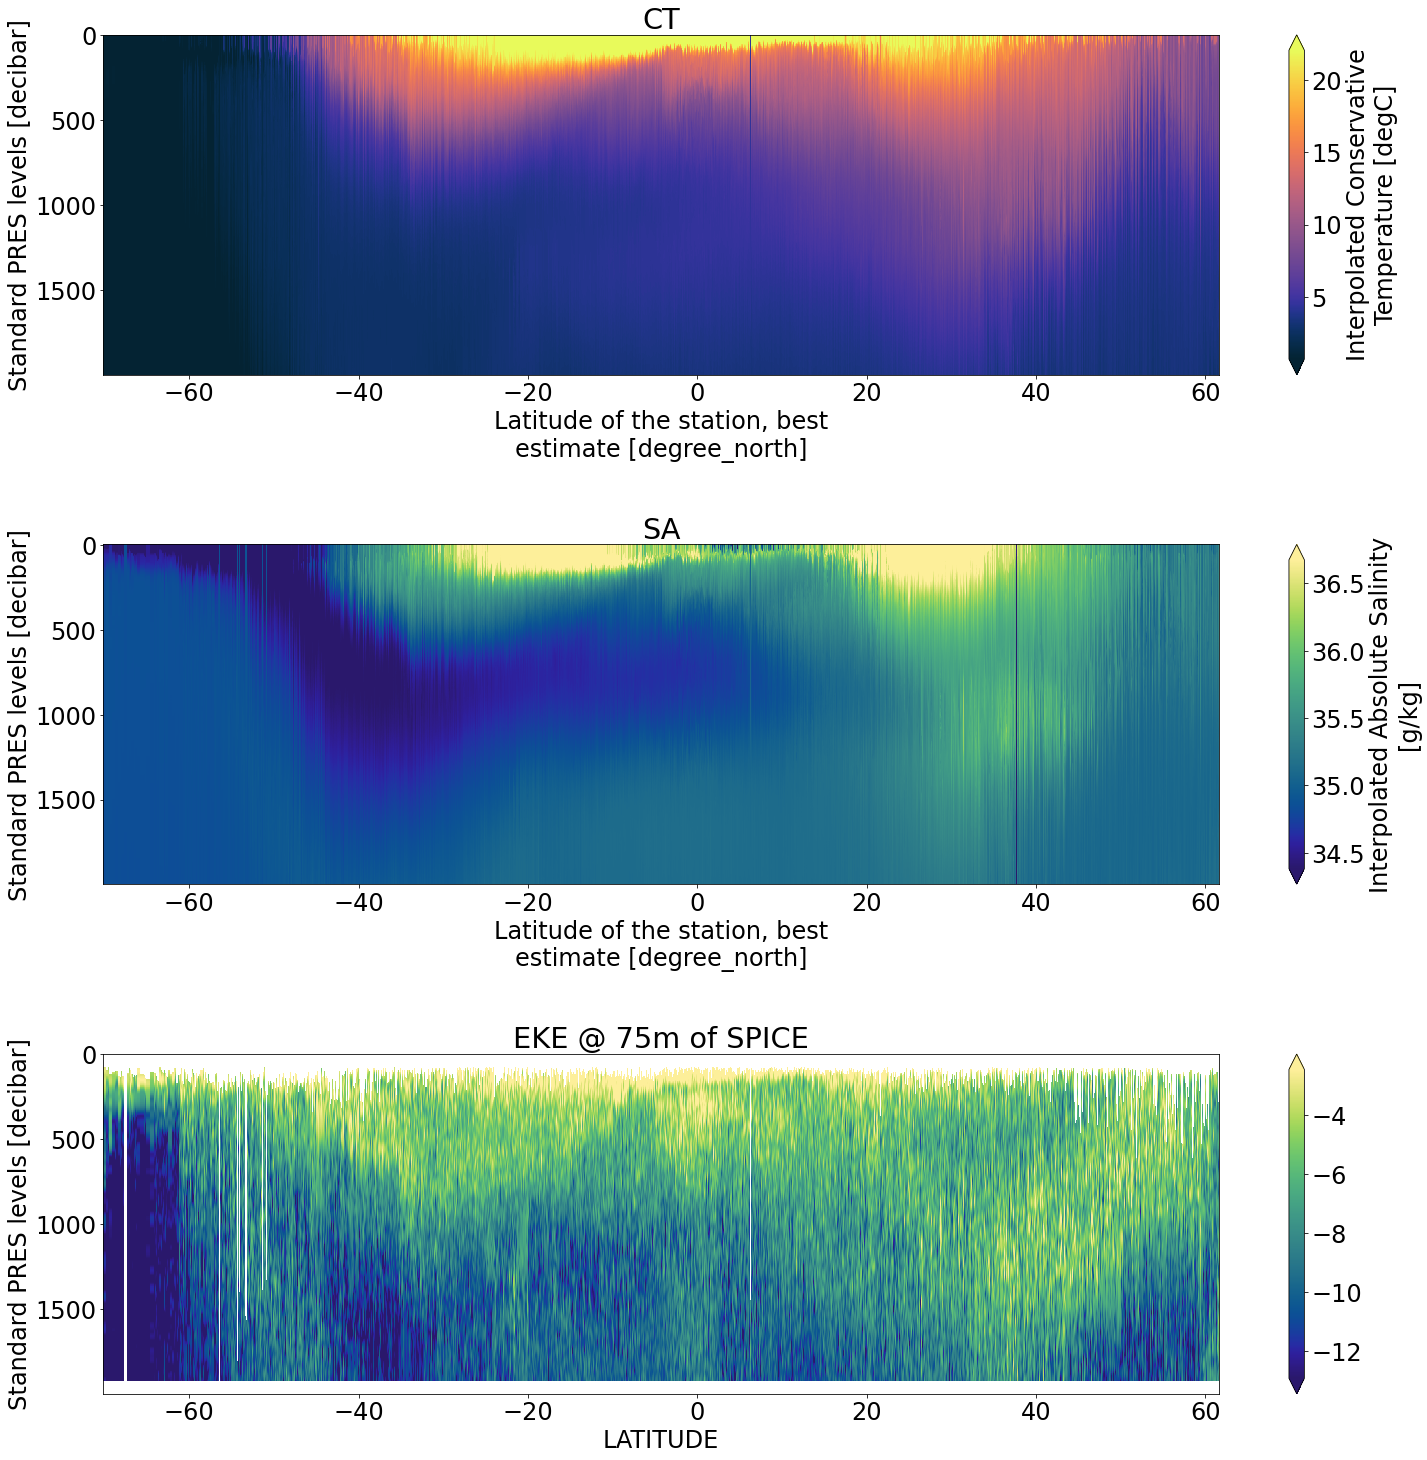

In [208]:
plt.figure(figsize=(25,25))

plt.subplot(311)
atl.CT.sortby(x).plot(x=x,y='PRES_INTERPOLATED',robust=True,cmap=cmo.thermal)
plt.gca().invert_yaxis()
plt.title('CT')

plt.subplot(312)
atl.SA.sortby(x).plot(x=x,y='PRES_INTERPOLATED',robust=True,cmap=cmo.haline)
plt.gca().invert_yaxis()
plt.title('SA')

plt.subplot(313)
np.log(atl_SPICE_anom_binned_EKE.where(atl_SPICE_anom_binned_EKE.mask==1)).sortby(x).plot(x=x, y='PRES_INTERPOLATED',robust=True,cmap=cmo.haline)
plt.gca().invert_yaxis()
plt.title('EKE @ {}m of SPICE'.format(lfilter))

plt.subplots_adjust(hspace=0.5)
#plt.savefig('/home.ufs/amf2288/argo-intern/fig_tests/atl.png')

### Pacific Full Section

In [200]:
pac = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-180,-175)_lat:(-70,70)_ds_z.nc')

In [202]:
temp_anom = pac.CT - pac.CT.mean('N_PROF')
psal_anom = pac.SA - pac.SA.mean('N_PROF')
spic_anom = pac.SPICE - pac.SPICE.mean('N_PROF')

pac = pac.assign(CT_anom=(['N_PROF','PRES_INTERPOLATED'],temp_anom.data))
pac = pac.assign(SA_anom=(['N_PROF','PRES_INTERPOLATED'],psal_anom.data))
pac = pac.assign(SPICE_anom=(['N_PROF','PRES_INTERPOLATED'],spic_anom.data))

In [205]:
lfilter = 75
lat_bins = np.arange(-70,70,5)
SPICE_anom_binned = pac.SPICE.groupby_bins('LATITUDE',lat_bins) - pac.SPICE.groupby_bins('LATITUDE',lat_bins).mean('N_PROF')
pac = pac.assign(SPICE_anom_binned=(['N_PROF','PRES_INTERPOLATED'],SPICE_anom_binned.data))
pac_SPICE_anom_binned_EKE = ef.get_EV(pac,lfilter,variable='SPICE_anom_binned')

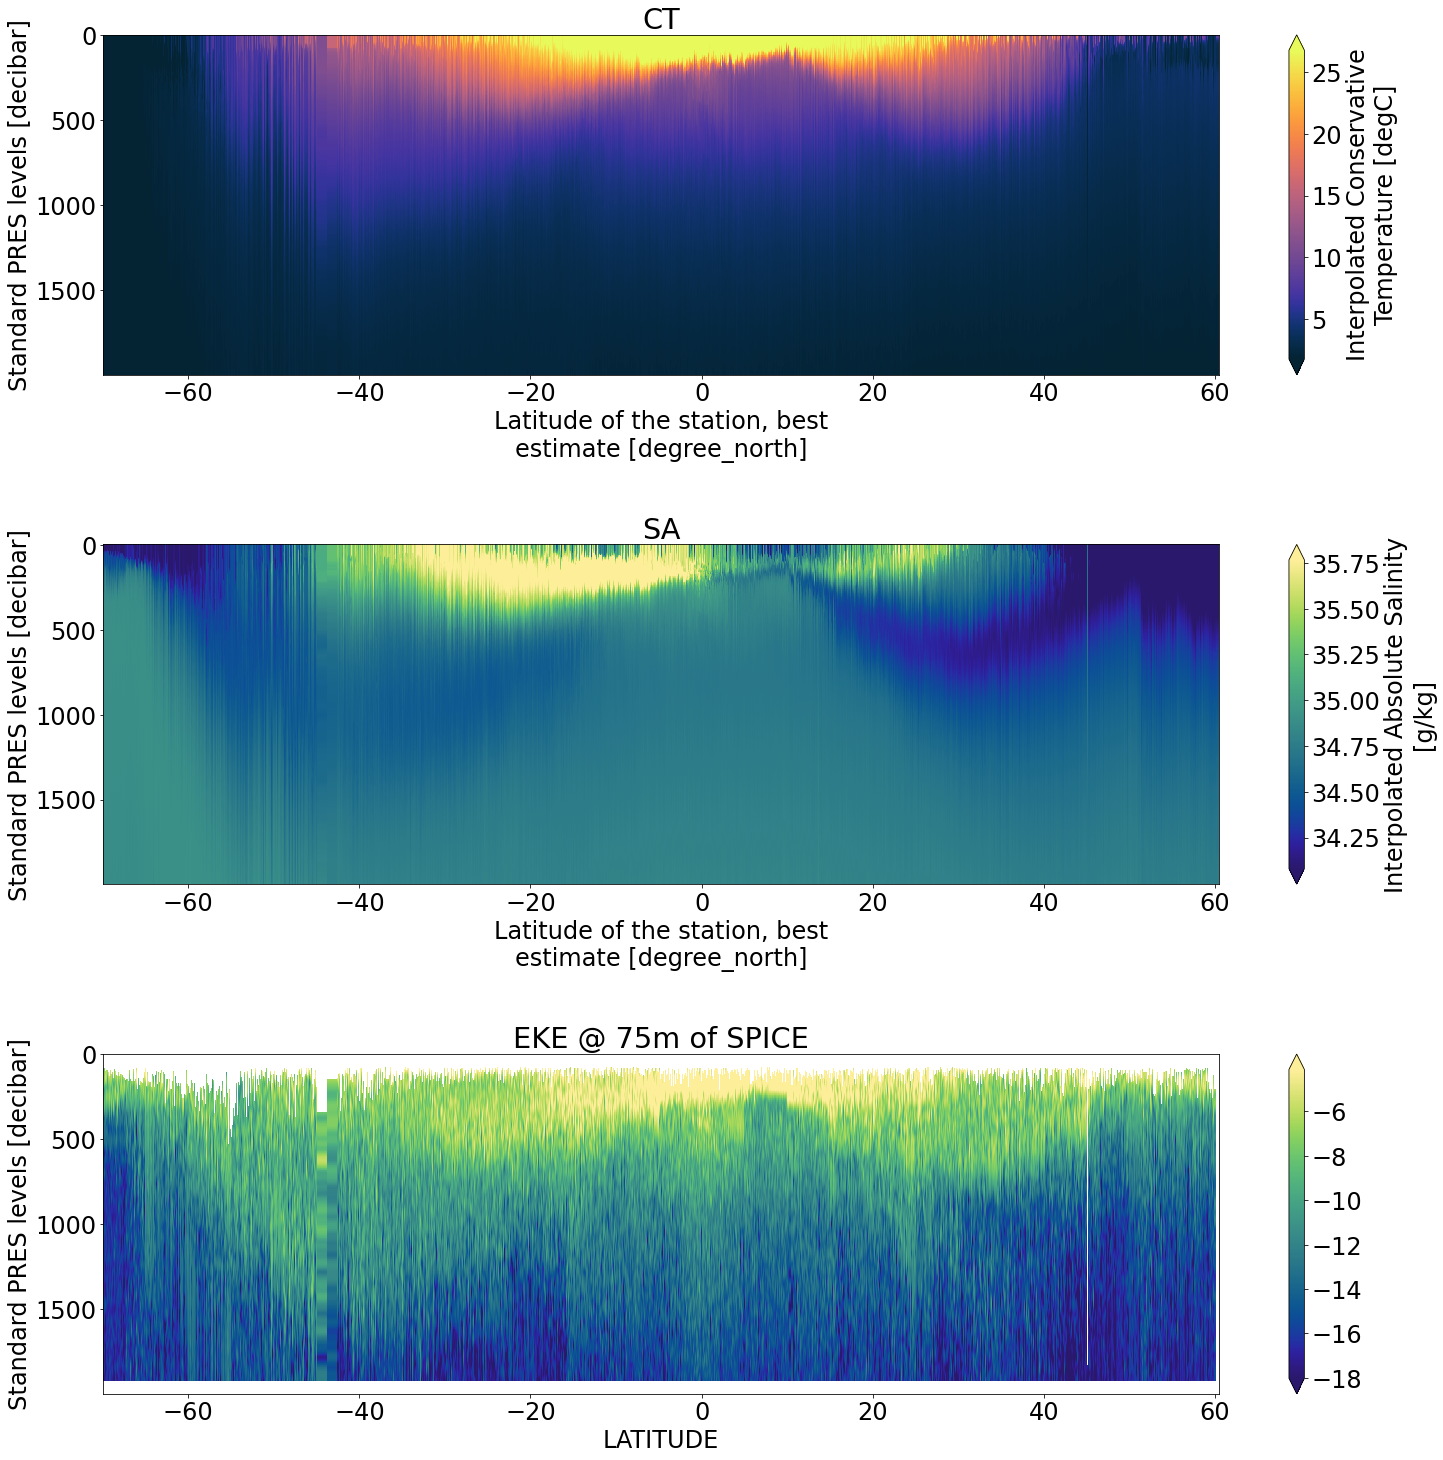

In [207]:
plt.figure(figsize=(25,25))

plt.subplot(311)
pac.CT.sortby(x).plot(x=x,y='PRES_INTERPOLATED',robust=True,cmap=cmo.thermal)
plt.gca().invert_yaxis()
plt.title('CT')

plt.subplot(312)
pac.SA.sortby(x).plot(x=x,y='PRES_INTERPOLATED',robust=True,cmap=cmo.haline)
plt.gca().invert_yaxis()
plt.title('SA')

plt.subplot(313)
np.log(pac_SPICE_anom_binned_EKE.where(pac_SPICE_anom_binned_EKE.mask==1)).sortby(x).plot(x=x, y='PRES_INTERPOLATED',robust=True,cmap=cmo.haline)
plt.gca().invert_yaxis()
plt.title('EKE @ {}m of SPICE'.format(lfilter))

plt.subplots_adjust(hspace=0.5)
#plt.savefig('/home.ufs/amf2288/argo-intern/fig_tests/pac.png')

### Atlantic Western Boundary

In [209]:
watl = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-60,-55)_lat:(10,45)_ds_z.nc')

In [214]:
watl=prf.get_MLD(watl)

In [216]:
temp_anom = watl.CT - watl.CT.mean('N_PROF')
psal_anom = watl.SA - watl.SA.mean('N_PROF')
spic_anom = watl.SPICE - watl.SPICE.mean('N_PROF')
watl = watl.assign(CT_anom=(['N_PROF','PRES_INTERPOLATED'],temp_anom.data))
watl = watl.assign(SA_anom=(['N_PROF','PRES_INTERPOLATED'],psal_anom.data))
watl = watl.assign(SPICE_anom=(['N_PROF','PRES_INTERPOLATED'],spic_anom.data))

In [217]:
lfilter = 75
lat_bins = np.arange(-70,70,5)
SPICE_anom_binned = watl.SPICE.groupby_bins('LATITUDE',lat_bins) - watl.SPICE.groupby_bins('LATITUDE',lat_bins).mean('N_PROF')
watl = watl.assign(SPICE_anom_binned=(['N_PROF','PRES_INTERPOLATED'],SPICE_anom_binned.data))
watl_SPICE_anom_binned_EKE = ef.get_EV(watl,lfilter,variable='SPICE_anom_binned')

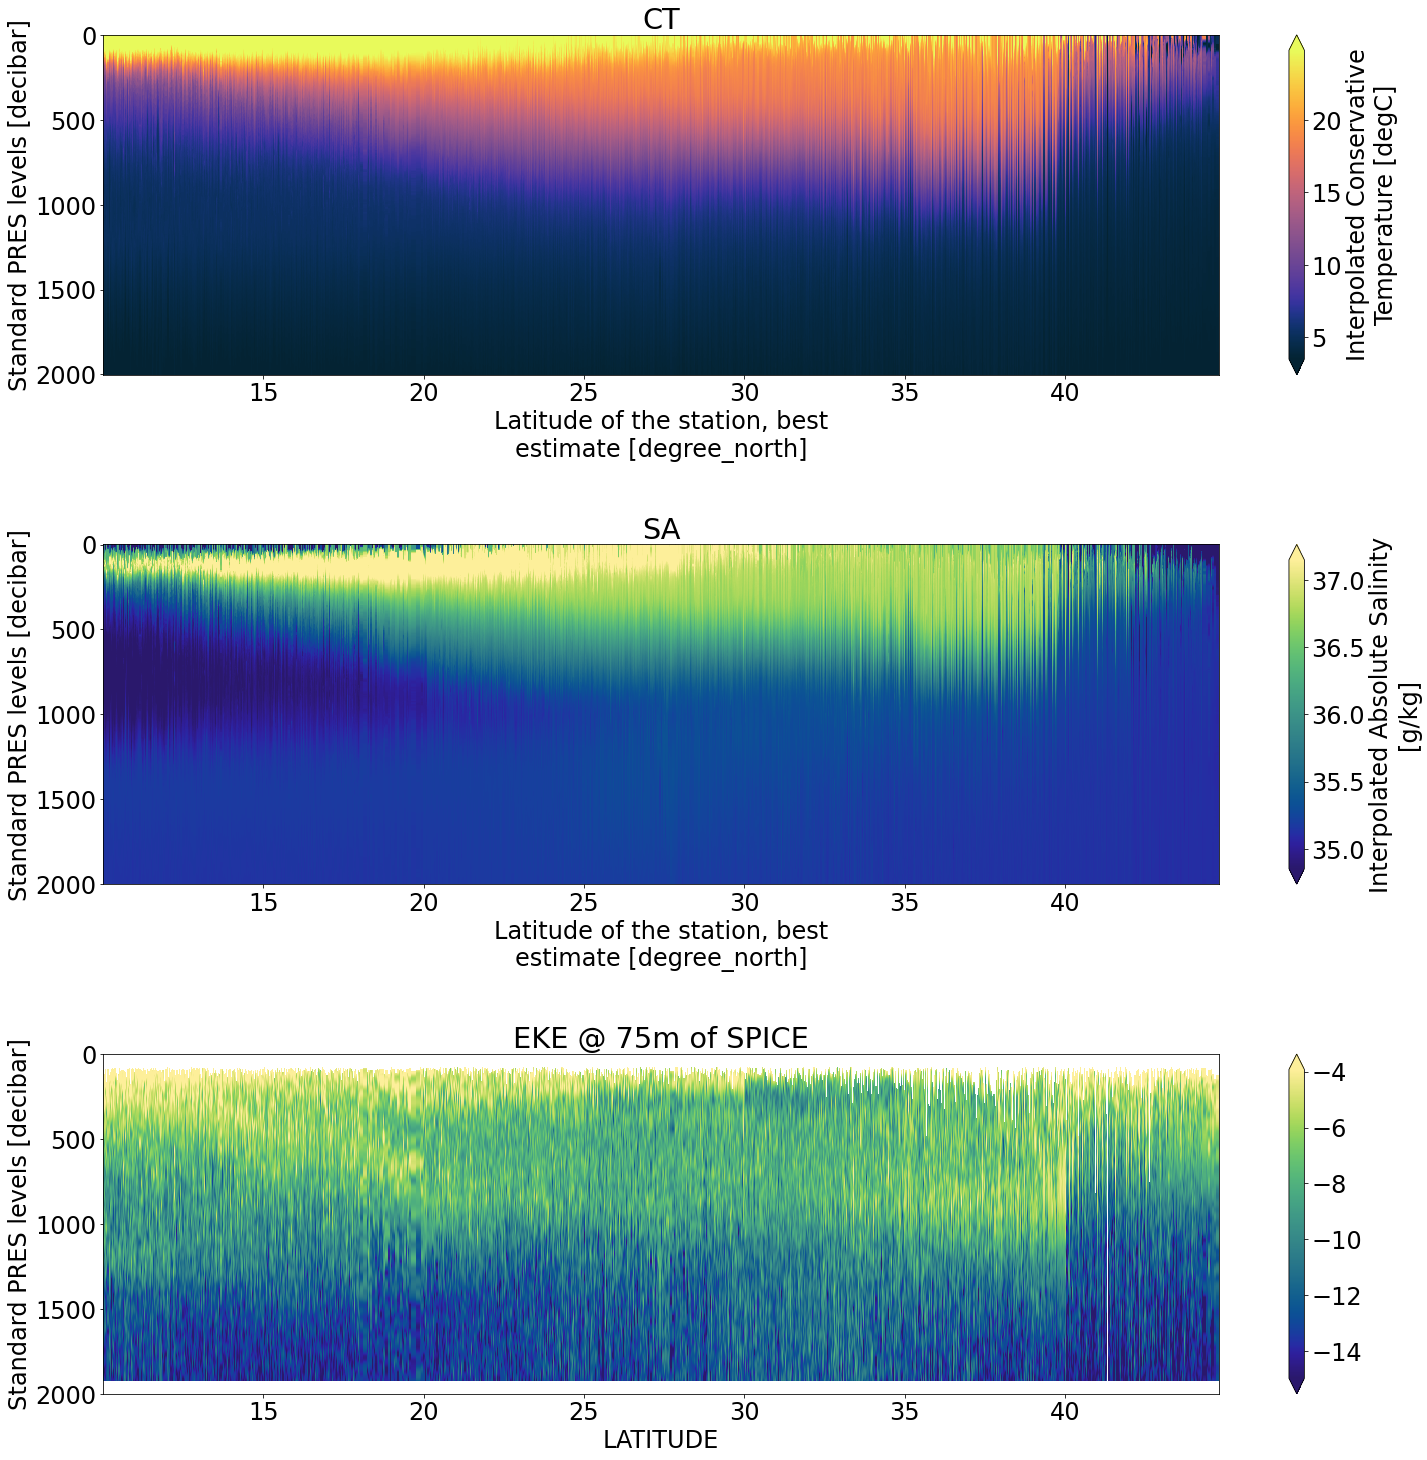

In [218]:
plt.figure(figsize=(25,25))

plt.subplot(311)
watl.CT.sortby(x).plot(x=x,y='PRES_INTERPOLATED',robust=True,cmap=cmo.thermal)
plt.gca().invert_yaxis()
plt.title('CT')

plt.subplot(312)
watl.SA.sortby(x).plot(x=x,y='PRES_INTERPOLATED',robust=True,cmap=cmo.haline)
plt.gca().invert_yaxis()
plt.title('SA')

plt.subplot(313)
np.log(watl_SPICE_anom_binned_EKE.where(watl_SPICE_anom_binned_EKE.mask==1)).sortby(x).plot(x=x, y='PRES_INTERPOLATED',robust=True,cmap=cmo.haline)
plt.gca().invert_yaxis()
plt.title('EKE @ {}m of SPICE'.format(lfilter))

plt.subplots_adjust(hspace=0.5)
#plt.savefig('/home.ufs/amf2288/argo-intern/fig_tests/pac.png')

### Pacific Western Boundary

In [ ]:
wpac = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-180,-175)_lat:(-70,70)_ds_z.nc')

In [ ]:
temp_anom = wpac.CT - wpac.CT.mean('N_PROF')
psal_anom = wpac.SA - wpac.SA.mean('N_PROF')
spic_anom = wpac.SPICE - wpac.SPICE.mean('N_PROF')
wpac = wpac.assign(CT_anom=(['N_PROF','PRES_INTERPOLATED'],temp_anom.data))
wpac = wpac.assign(SA_anom=(['N_PROF','PRES_INTERPOLATED'],psal_anom.data))
wpac = wpac.assign(SPICE_anom=(['N_PROF','PRES_INTERPOLATED'],spic_anom.data))

In [ ]:
lfilter = 75
lat_bins = np.arange(-70,70,5)
SPICE_anom_binned = wpac.SPICE.groupby_bins('LATITUDE',lat_bins) - wpac.SPICE.groupby_bins('LATITUDE',lat_bins).mean('N_PROF')
wpac = wpac.assign(SPICE_anom_binned=(['N_PROF','PRES_INTERPOLATED'],SPICE_anom_binned.data))
wpac_SPICE_anom_binned_EKE = ef.get_EV(wpac,lfilter,variable='SPICE_anom_binned')

In [ ]:
plt.figure(figsize=(25,25))

plt.subplot(311)
wpac.CT.sortby(x).plot(x=x,y='PRES_INTERPOLATED',robust=True,cmap=cmo.thermal)
plt.gca().invert_yaxis()
plt.title('CT')

plt.subplot(312)
wpac.SA.sortby(x).plot(x=x,y='PRES_INTERPOLATED',robust=True,cmap=cmo.haline)
plt.gca().invert_yaxis()
plt.title('SA')

plt.subplot(313)
np.log(wpac_SPICE_anom_binned_EKE.where(wpac_SPICE_anom_binned_EKE.mask==1)).sortby(x).plot(x=x, y='PRES_INTERPOLATED',robust=True,cmap=cmo.haline)
plt.gca().invert_yaxis()
plt.title('EKE @ {}m of SPICE'.format(lfilter))

plt.subplots_adjust(hspace=0.5)
#plt.savefig('/home.ufs/amf2288/argo-intern/fig_tests/pac.png')

### Indian Western Boundary

In [ ]:
wind = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-180,-175)_lat:(-70,70)_ds_z.nc')

In [ ]:
temp_anom = wind.CT - wind.CT.mean('N_PROF')
psal_anom = wind.SA - wind.SA.mean('N_PROF')
spic_anom = wind.SPICE - wind.SPICE.mean('N_PROF')
wind = wind.assign(CT_anom=(['N_PROF','PRES_INTERPOLATED'],temp_anom.data))
wind = wind.assign(SA_anom=(['N_PROF','PRES_INTERPOLATED'],psal_anom.data))
wind = wind.assign(SPICE_anom=(['N_PROF','PRES_INTERPOLATED'],spic_anom.data))

In [ ]:
lfilter = 75
lat_bins = np.arange(-70,70,5)
SPICE_anom_binned = wind.SPICE.groupby_bins('LATITUDE',lat_bins) - wind.SPICE.groupby_bins('LATITUDE',lat_bins).mean('N_PROF')
wind = pac.assign(SPICE_anom_binned=(['N_PROF','PRES_INTERPOLATED'],SPICE_anom_binned.data))
wind_SPICE_anom_binned_EKE = ef.get_EV(wind,lfilter,variable='SPICE_anom_binned')

In [ ]:
plt.figure(figsize=(25,25))

plt.subplot(311)
wind.CT.sortby(x).plot(x=x,y='PRES_INTERPOLATED',robust=True,cmap=cmo.thermal)
plt.gca().invert_yaxis()
plt.title('CT')

plt.subplot(312)
wind.SA.sortby(x).plot(x=x,y='PRES_INTERPOLATED',robust=True,cmap=cmo.haline)
plt.gca().invert_yaxis()
plt.title('SA')

plt.subplot(313)
np.log(wind_SPICE_anom_binned_EKE.where(wind_SPICE_anom_binned_EKE.mask==1)).sortby(x).plot(x=x, y='PRES_INTERPOLATED',robust=True,cmap=cmo.haline)
plt.gca().invert_yaxis()
plt.title('EKE @ {}m of SPICE'.format(lfilter))

plt.subplots_adjust(hspace=0.5)
#plt.savefig('/home.ufs/amf2288/argo-intern/fig_tests/pac.png')